In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('california_housing_train.csv')

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


## Data Cleansing

- Terdapat tipe data yang tidak sesuai atau tidak
- Terdapat missing value, outlier dan duplikasi data

In [6]:
# cek apakah terdapat duplikasi data
df.duplicated().sum()

0

In [7]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

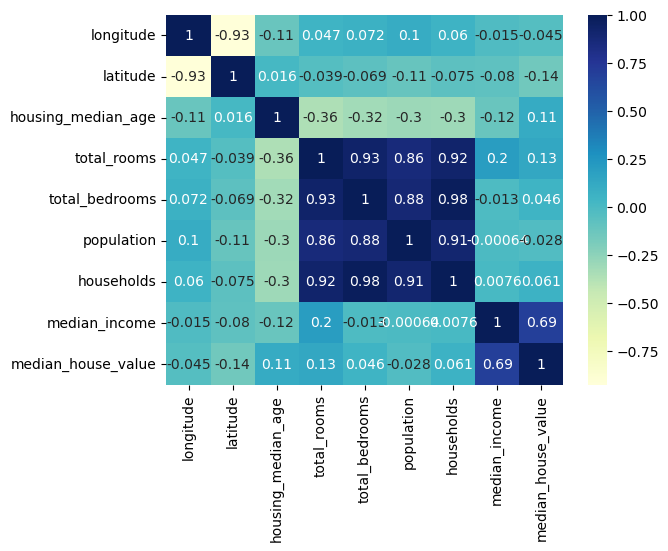

In [8]:
# features selection
corr_datasets = df.corr()
sns.heatmap(data=corr_datasets, annot=True, cbar=True, cmap="YlGnBu")
plt.show()

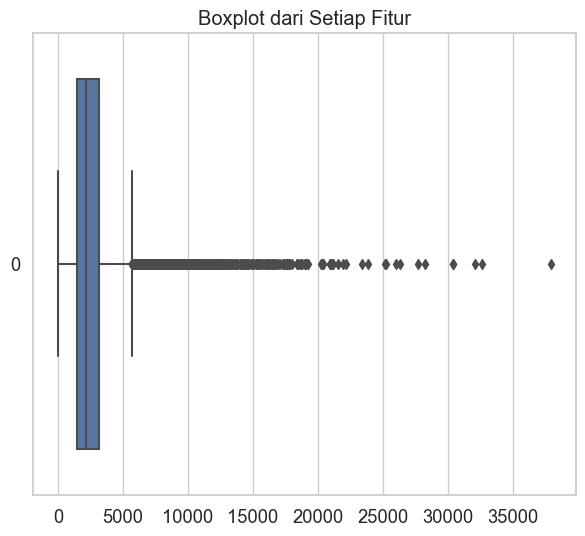

In [9]:
# Plot boxplot untuk setiap fitur
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(7, 6))
sns.boxplot(data=df['total_rooms'], orient="h")
plt.title("Boxplot dari Setiap Fitur")
plt.show()

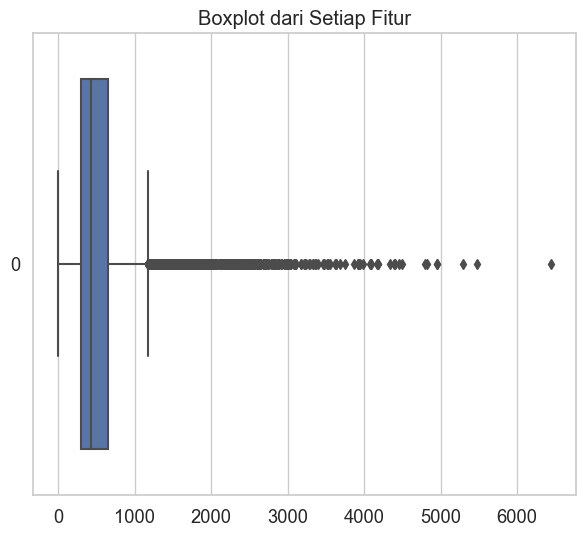

In [10]:
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(7, 6))
sns.boxplot(data=df['total_bedrooms'], orient="h")
plt.title("Boxplot dari Setiap Fitur")
plt.show()

In [11]:
# menghapus nilai outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

In [12]:
# menghapus nilai outliers
data_california = df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]

In [13]:
data_california.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0


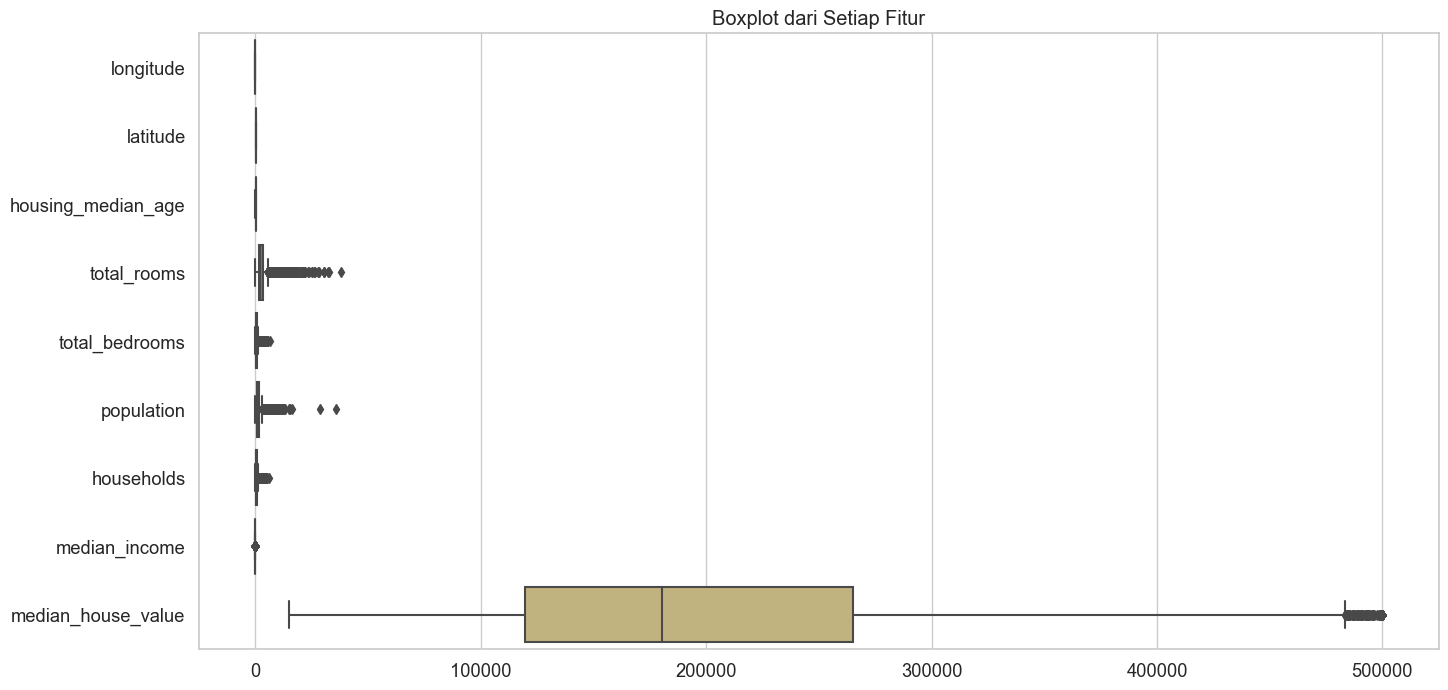

In [14]:
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(16, 8))
sns.boxplot(data=df, orient="h")
plt.title("Boxplot dari Setiap Fitur")
plt.show()

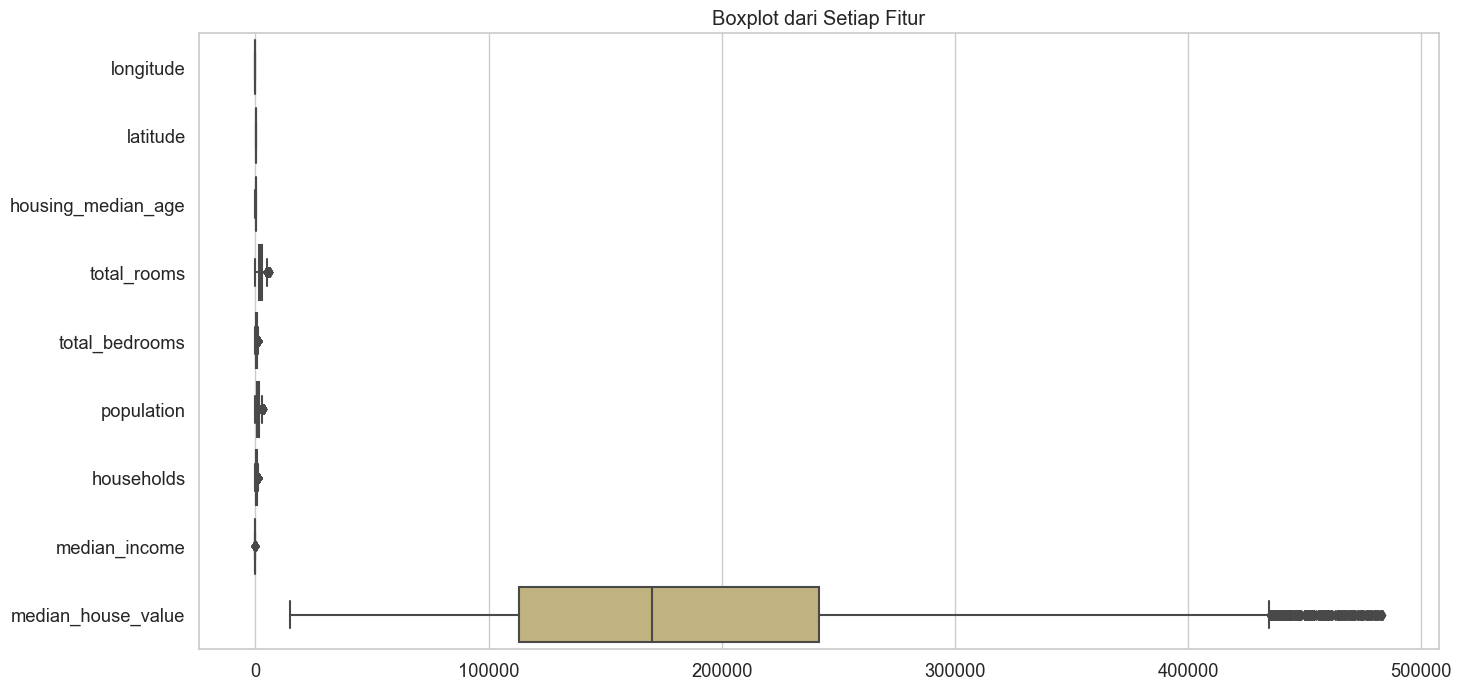

In [15]:
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(16, 8))
sns.boxplot(data=data_california, orient="h")
plt.title("Boxplot dari Setiap Fitur")
plt.show()

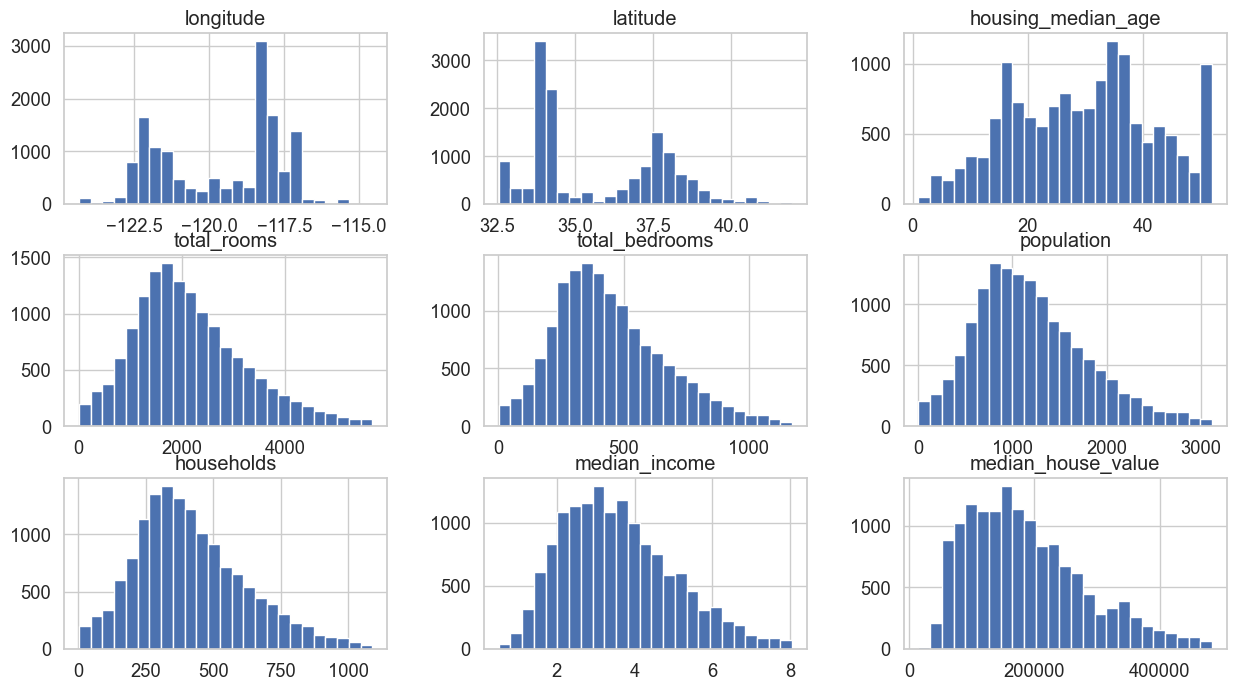

In [16]:
# melihat distribusi data
data_california.hist(bins=25, figsize=(15,8))
plt.show()

## Train Test Split

In [193]:
X = data_california.drop('median_house_value', axis=1)
y = data_california['median_house_value'].values

In [418]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [419]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11580, 8), (2896, 8), (11580,), (2896,))

In [420]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

LinearRegression()

In [421]:
# standarisasi features
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaler.fit(X_train)

scaler_min_max = MinMaxScaler()
X_train_min_max = scaler_min_max.fit_transform(X_train)

X_train_std = scaler.transform(X_train)

In [134]:
linear_model_std = LinearRegression()
linear_model_std.fit(X_train_std, y_train)

LinearRegression()

In [106]:
linear_model_min_max = LinearRegression()
linear_model_min_max.fit(X_train_min_max, y_train)

LinearRegression()

In [24]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel='linear', gamma='scale', C=20)
svr_regressor.fit(X_train, y_train)

SVR(C=20, kernel='linear')

In [25]:
svm_std = SVR(kernel='linear')
svm_std.fit(X_train_std, y_train)

SVR(kernel='linear')

In [26]:
svm_min_max = SVR(kernel='linear')
svm_min_max.fit(X_train_min_max, y_train)

SVR(kernel='linear')

## Modeling With XGBoost

In [458]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

regressor = XGBRegressor()

# param = {
#     "max_depth": range(1, 101, 2),
#     "min_samples_split": range(2, 101, 3),
#     "min_samples_leaf": range(1, 51, 2)
# }

regressor.fit(X_train_std, y_train)
# grid_search = GridSearchCV(regressor, param_grid=param, cv=3, n_jobs=-1, verbose=1)
# grid_search.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [316]:
grid_search.best_params_, grid_search.best_score_

({'max_depth': 15, 'min_samples_leaf': 35, 'min_samples_split': 77},
 0.4748983865062202)

## Evaluate and Prediction

In [455]:
linear_model.score(X_train, y_train)

0.6200273974652835

In [480]:
svr_regressor.score(X_train, y_train), svm_std.score(X_train_std, y_train)

(0.5828416182481914, 0.069657617779457)

In [461]:
# grid_search.score(X_train, y_train), grid_search.score(X_test, y_test)
regressor.score(X_train_std, y_train), regressor.score(scaler.transform(X_test), y_test)

(0.9383642129883547, 0.8076849766921163)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse = mean_squared_error(y_test, linear_model.predict(X_test))
r_squared = r2_score(y_test, linear_model.predict(X_test))
mse_std = mean_squared_error(y_test, linear_model_std.predict(scaler.transform(X_test)))
r_squared_std = r2_score(y_test, linear_model_std.predict(scaler.transform(X_test)))

print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2) Score:", r_squared)
print("Mean Squared Error (MSE):", mse_std)
print("R-squared (R^2) Score:", r_squared_std)

## Prediction

In [471]:
y_test[:10]

array([ 74100., 307400., 343300., 162900.,  78200., 136800., 112500.,
       115000., 193800., 135600.])

In [473]:
regressor.predict(scaler.transform(X_test[:10]))

array([ 65912.51 , 300087.94 , 378897.94 , 155824.47 ,  70630.77 ,
       116098.56 , 114778.914, 197427.17 , 289960.53 , 173989.05 ],
      dtype=float32)

In [439]:
linear_model.predict(X_test[:10])

array([115412.48685893, 236490.87858939, 359938.62793027, 144215.54529521,
        90915.60485023, 137307.48922832, 121624.51255221, 187664.91519158,
       191757.02574111, 175766.70841848])

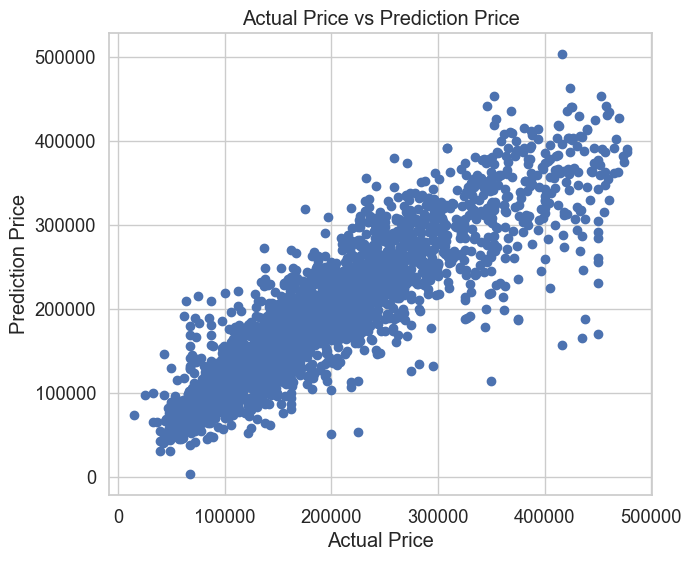

In [478]:
# visualize of prediction
plt.figure(figsize=(7,6))
plt.scatter(y_test,regressor.predict(scaler.transform(X_test)))
plt.title('Actual Price vs Prediction Price')
plt.xlabel('Actual Price')
plt.ylabel('Prediction Price')
plt.show()